In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.special import gamma, factorial

In [2]:
joao = True
if joao:
    pedestal = pd.read_csv("output_pedestal_Joao.txt", sep=" ")
    sinal = pd.read_csv("output_sinal_Joao.txt", sep=" ")
else:
    pedestal = pd.read_csv("output_pedestal_Katherine.txt", sep=" ")
    sinal = pd.read_csv("output_sinal_Katherine.txt", sep=" ")

In [3]:
sinal

,ADC1,ADC2,NaN
1,62,488,NaN
1,103,810,NaN
1,620,4095,NaN
1,48,373,NaN
1,74,568,NaN
...,...,...,...
1,106,827,NaN
1,82,637,NaN
1,125,980,NaN
1,81,632,NaN


In [4]:
pedestal

,ADC1,ADC2,NaN
1,70,549,NaN
1,44,335,NaN
1,53,412,NaN
1,43,330,NaN
1,53,410,NaN
...,...,...,...
1,50,382,NaN
1,43,331,NaN
1,50,386,NaN
1,43,330,NaN


In [5]:
if not joao:
    pedestal = pedestal[pedestal['ADC2']*0.025<20]

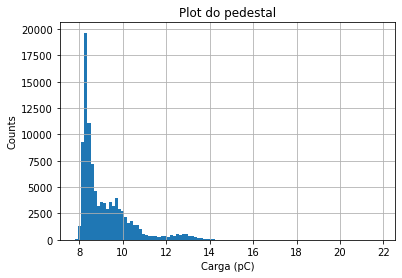

In [6]:
n, bins, patches = plt.hist(pedestal['ADC2']*0.025, 100)
plt.xlabel('Carga (pC)')
plt.ylabel('Counts')
#plt.semilogy()
plt.title("Plot do pedestal")
plt.grid(True)
plt.show()

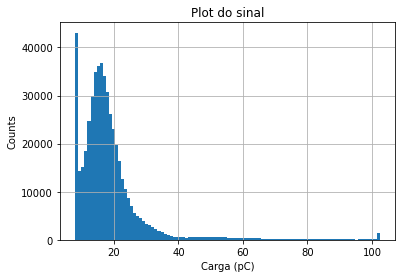

In [7]:
n, bins, patches = plt.hist(sinal['ADC2']*0.025, 100)
plt.xlabel('Carga (pC)')
plt.ylabel('Counts')
#plt.semilogy()
plt.title("Plot do sinal")
plt.grid(True)
plt.show()

In [16]:
pedestal['ADC2'].mean()*0.025

9.1876695

In [17]:
math.sqrt(pedestal['ADC2'].var())*0.025

1.1705607356707763

In [18]:
pedestal['ADC1'].mean()*0.2

9.559222

In [19]:
math.sqrt(pedestal['ADC1'].var())*0.2

1.1827146498016452

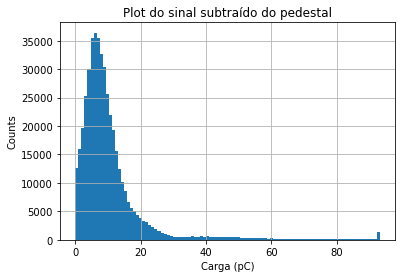

In [12]:
n, bins, patches = plt.hist((sinal['ADC2']-pedestal['ADC2'].mean())*0.025, 100,range=[0, np.max((sinal['ADC2']-pedestal['ADC2'].mean())*0.025)])
plt.xlabel('Carga (pC)')
plt.ylabel('Counts')
#plt.semilogy()
plt.title("Plot do sinal subtraído do pedestal")
plt.grid(True)
plt.show()

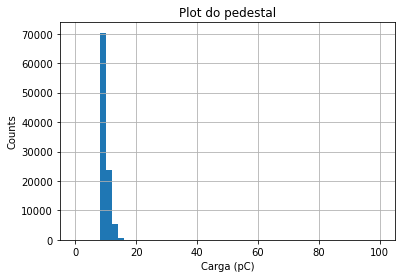

In [13]:
n, bins, patches = plt.hist(pedestal['ADC1']*0.2, 50,range=[0, 100])
plt.xlabel('Carga (pC)')
plt.ylabel('Counts')
#plt.semilogy()
plt.title("Plot do pedestal")
plt.grid(True)
plt.show()

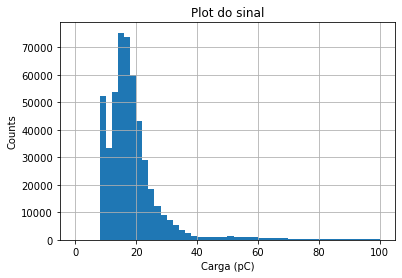

In [14]:
n, bins, patches = plt.hist(sinal['ADC1']*0.2, 50,range=[0, 100])
plt.xlabel('Carga (pC)')
plt.ylabel('Counts')
#plt.semilogy()
plt.title("Plot do sinal")
plt.grid(True)
plt.show()

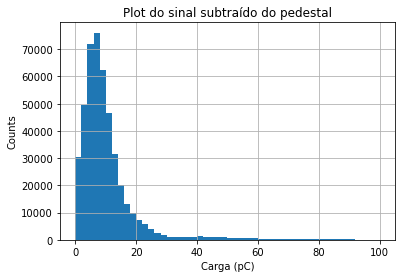

In [15]:
n, bins, patches = plt.hist((sinal['ADC1']-pedestal['ADC1'].mean())*0.2, 50,range=[0, 100])
plt.xlabel('Carga (pC)')
plt.ylabel('Counts')
#plt.semilogy()
plt.title("Plot do sinal subtraído do pedestal")
plt.grid(True)
plt.show()

In [20]:
(sinal['ADC2']-pedestal['ADC2'].mean()).mean()*0.025

9.494415050000006

In [26]:
math.sqrt((sinal['ADC2']-pedestal['ADC2'].mean()).mean()*0.025)

3.0813008697626407

In [22]:
(sinal['ADC1']-pedestal['ADC1'].mean()).mean()*0.2

9.684298399999989

In [27]:
math.sqrt((sinal['ADC1']-pedestal['ADC1'].mean()).mean()*0.2)

3.111960539595576